In [1]:
import pandas as pd
import numpy as np
import dateutil
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from apyori import apriori

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("sales_data_2017_2018_for_tableau_with_new_date_columns.csv")
df

,receipt_id,date,hour,quarter,year,month_number,month_name,day_of_week_name,week_number,is_weekday,...,main_category,sub_category,quantity,payment_type,unit_buying_price,unit_selling_price,unit_price_margin,total_buying_price,total_selling_price,total_profit
0,14b5b35b-4155-45c5-9fa1-58e81d508a25,4/2/2018 2:16:32 PM,14,2,2018,4,April,Monday,14,1,...,Fresh Produce,Tomatoes,0.132,cash,0.0,4.99,4.99,0.0,0.65868,0.65868
1,45755456-0890-450a-af1b-b10b0c197af4,1/25/2018 11:54:20 AM,11,1,2018,1,January,Thursday,4,1,...,Fresh Produce,Tomatoes,0.134,cash,0.0,4.99,4.99,0.0,0.66866,0.66866
2,48910672-6e70-4c1a-8efc-e348c45d519c,4/13/2018 5:40:15 PM,17,2,2018,4,April,Friday,15,1,...,Fresh Produce,Tomatoes,0.136,cash,0.0,4.99,4.99,0.0,0.67864,0.67864
3,dd2882f2-4211-4828-bccb-b53821d29559,1/11/2018 1:44:42 PM,13,1,2018,1,January,Thursday,2,1,...,Fresh Produce,Tomatoes,0.138,cash,0.0,4.99,4.99,0.0,0.68862,0.68862
4,142d4d58-c63b-4fff-80c0-da43e87a2070,1/18/2018 2:28:24 PM,14,1,2018,1,January,Thursday,3,1,...,Fresh Produce,Tomatoes,0.144,cash,0.0,4.99,4.99,0.0,0.71856,0.71856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372752,06086db0-c9e5-4024-a66e-6106b38f8e81,8/7/2017 5:30:21 PM,17,3,2017,8,August,Monday,32,1,...,Fresh Produce,Other Vegies,0.528,magcard,0.0,4.99,4.99,0.0,2.63472,2.63472
372753,9a4e234c-ac74-4eee-bc7f-50f6e12c62bd,7/24/2017 9:21:01 AM,9,3,2017,7,July,Monday,30,1,...,Fresh Produce,Other Vegies,0.540,magcard,0.0,4.99,4.99,0.0,2.69460,2.69460
372754,3bb04ebc-4f78-45b6-b077-d8d18dcd1219,5/22/2017 2:47:43 PM,14,2,2017,5,May,Monday,21,1,...,Fresh Produce,Other Vegies,0.542,magcard,0.0,4.99,4.99,0.0,2.70458,2.70458
372755,8f26349f-ff68-4525-9d29-b3b96c751eb7,1/15/2017 3:55:00 AM,3,1,2017,1,January,Sunday,3,0,...,Fresh Produce,Other Vegies,0.542,magcard,0.0,4.99,4.99,0.0,2.70458,2.70458


### Summary Statistics

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372757 entries, 0 to 372756
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   receipt_id           372757 non-null  object 
 1   date                 372757 non-null  object 
 2   hour                 372757 non-null  int64  
 3   quarter              372757 non-null  int64  
 4   year                 372757 non-null  int64  
 5   month_number         372757 non-null  int64  
 6   month_name           372757 non-null  object 
 7   day_of_week_name     372757 non-null  object 
 8   week_number          372757 non-null  int64  
 9   is_weekday           372757 non-null  int64  
 10  is_weekend           372757 non-null  int64  
 11  item_code            372757 non-null  float64
 12  item_name            372757 non-null  object 
 13  main_category        372757 non-null  object 
 14  sub_category         372757 non-null  object 
 15  quantity         

In [139]:
df.describe()

,hour,quarter,year,month_number,week_number,is_weekday,is_weekend,item_code,quantity,unit_buying_price,unit_selling_price,unit_price_margin,total_buying_price,total_selling_price,total_profit
count,372757.000000,372757.000000,372757.000000,372757.000000,372757.000000,372757.000000,372757.000000,3.727570e+05,372757.000000,286348.000000,372757.000000,372757.000000,286348.000000,372757.000000,372757.000000
mean,12.504844,2.408400,2017.471103,6.202019,25.192002,0.724367,0.275633,3.938680e+13,0.894873,0.681056,4.038706,2.927081,0.578294,2.886697,1.892670
std,4.792523,1.139732,0.499165,3.516934,15.331586,0.446833,0.446833,8.263254e+14,0.736756,1.657377,3.196027,3.205571,1.322555,2.561682,2.021141
min,0.000000,1.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,1.001000e+03,0.002000,0.000000,0.800000,-20.000000,0.000000,0.003980,-11.250000
25%,10.000000,1.000000,2017.000000,3.000000,11.000000,0.000000,0.000000,1.071000e+03,0.448000,0.000000,2.000000,1.000000,0.000000,1.500000,0.719320
50%,13.000000,2.000000,2017.000000,6.000000,25.000000,1.000000,0.000000,2.001000e+03,1.000000,0.000000,2.990000,2.000000,0.000000,2.325340,1.438800
75%,16.000000,3.000000,2018.000000,9.000000,39.000000,1.000000,1.000000,2.072000e+03,1.000000,1.000000,4.990000,3.500000,0.722000,3.500000,2.500000
max,23.000000,4.000000,2018.000000,12.000000,53.000000,1.000000,1.000000,9.188933e+16,30.000000,45.000000,43.000000,25.000000,64.000000,159.960000,137.200000


In [140]:
df.isnull().sum().sort_values(ascending = False)

total_buying_price     86409
unit_buying_price      86409
receipt_id                 0
item_name                  0
total_selling_price        0
unit_price_margin          0
unit_selling_price         0
payment_type               0
quantity                   0
sub_category               0
main_category              0
item_code                  0
date                       0
is_weekend                 0
is_weekday                 0
week_number                0
day_of_week_name           0
month_name                 0
month_number               0
year                       0
quarter                    0
hour                       0
total_profit               0
dtype: int64

In [141]:
df[df.isna().any(axis=1)]

,receipt_id,date,hour,quarter,year,month_number,month_name,day_of_week_name,week_number,is_weekday,...,main_category,sub_category,quantity,payment_type,unit_buying_price,unit_selling_price,unit_price_margin,total_buying_price,total_selling_price,total_profit
8351,010b702d-c523-46ab-bb46-5e04d68fd224,1/2/2018 3:14:14 PM,15,1,2018,1,January,Tuesday,1,1,...,Fresh Produce,Asian Vegies,1.0,cash,NaN,0.90,0.40,NaN,0.90,0.40
8352,01489e21-5299-4671-9aeb-82c5827d6ffd,7/16/2018 12:11:13 PM,12,3,2018,7,July,Monday,29,1,...,Fresh Produce,Asian Vegies,1.0,cash,NaN,0.90,0.40,NaN,0.90,0.40
8353,02b5b11f-525b-4d89-9431-d5a49225e2e4,1/23/2018 3:07:20 PM,15,1,2018,1,January,Tuesday,4,1,...,Fresh Produce,Asian Vegies,1.0,cash,NaN,0.90,0.40,NaN,0.90,0.40
8354,04c35a9c-b3ce-45d0-a273-dc6b8a952d83,2/8/2018 3:50:09 PM,15,1,2018,2,February,Thursday,6,1,...,Fresh Produce,Asian Vegies,1.0,cash,NaN,0.90,0.40,NaN,0.90,0.40
8355,050eb31d-65a9-4068-a54d-478b11330ab5,10/8/2018 5:51:56 PM,17,4,2018,10,October,Monday,41,1,...,Fresh Produce,Asian Vegies,1.0,cash,NaN,0.90,0.40,NaN,0.90,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359014,27287bb6-8a46-47ca-8738-51e659a5fa36,8/27/2017 10:43:17 AM,10,3,2017,8,August,Sunday,35,0,...,Fresh Produce,Citrus Fruits,1.0,magcard,NaN,3.99,0.49,NaN,3.99,0.49
359015,29fdfa79-e4f7-473d-b435-6b568c30e536,10/7/2017 4:13:33 PM,16,4,2017,10,October,Saturday,40,0,...,Fresh Produce,Citrus Fruits,1.0,magcard,NaN,3.99,0.49,NaN,3.99,0.49
359016,2b92d0ec-be54-4a5e-82f5-74e06676bfae,9/8/2017 3:11:17 PM,15,3,2017,9,September,Friday,36,1,...,Fresh Produce,Citrus Fruits,1.0,magcard,NaN,3.99,0.49,NaN,3.99,0.49
359017,2e9bf85c-a382-4e03-a075-9e992f28f853,6/3/2017 11:50:43 AM,11,2,2017,6,June,Saturday,22,0,...,Fresh Produce,Citrus Fruits,1.0,magcard,NaN,3.99,0.49,NaN,3.99,0.49


##### This output shows us more clearly that the unit_buying_price and hence, total_buying_price has 86,409 missing values which is around 25% of the total data.

In [142]:
df = df.dropna()

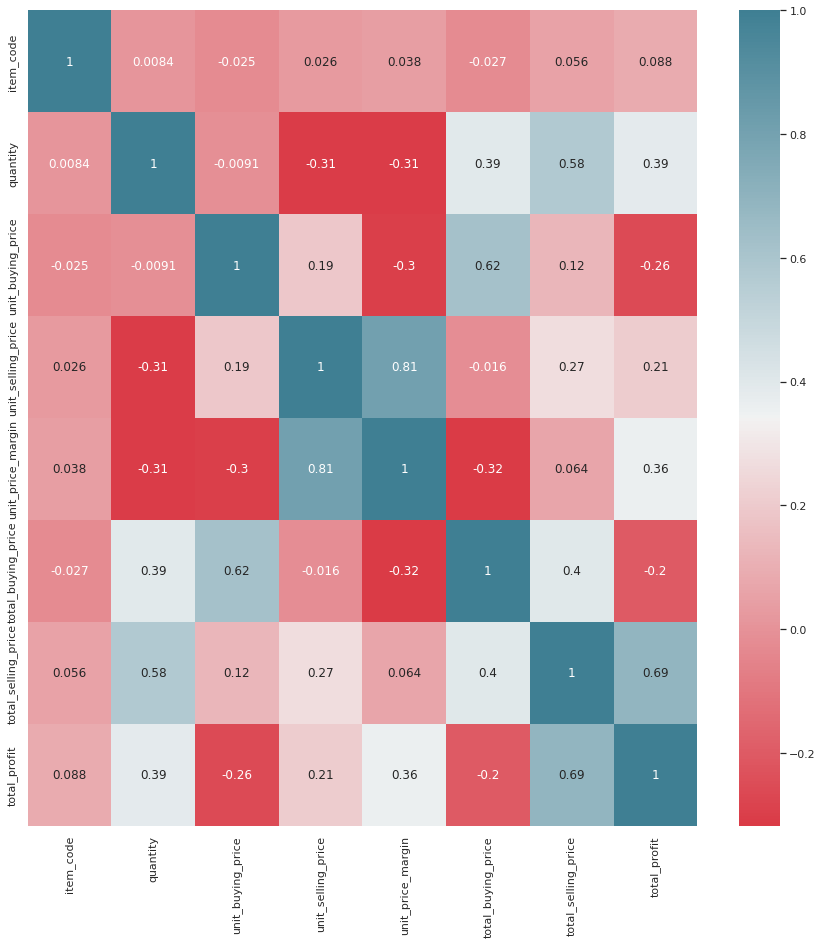

In [143]:

df_new = pd.read_csv("sales_data_2017_2018.csv")
df_new


corr_matrix = df.corr()

cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.set(rc={'figure.figsize':(15,15)})
s = sns.heatmap(corr_matrix, annot=True, cmap=cmap)

fig = s.get_figure()
fig.savefig("out.png")

## Data Cleaning


1.1 During our analysis, it is also observed that there are 2 columns- "Beverages" and "Beverage" that we can unify as one

1.2 In the sub_category column, many observations were misspelled. We replace the incorrect values

In [4]:
# 1.1 

df['main_category'].replace('Beverages','Beverage', regex=True, inplace = True)


# 2.1

df['sub_category'].replace('Biscuits','Biscuit', regex=True, inplace = True)
df['sub_category'].replace('Cocunut Products','Coconut Products', regex=True, inplace = True)
df['sub_category'].replace('Condiments','Condiment', regex=True, inplace = True)
df['sub_category'].replace('Packaed','Packaged', regex=True, inplace = True)
df['sub_category'].replace('Sauces','Sauce', regex=True, inplace = True)
df['sub_category'].replace('Spides','Spices', regex=True, inplace = True)
df['sub_category'].replace('Sweets','Sweet', regex=True, inplace = True)
df['sub_category'].replace('spices','Spices', regex=True, inplace = True)


# Convert all Item_names to Sentence Case

df['item_name'] = df['item_name'].str.title()

# Implementing Frequent Itemset Mining using Apriori Algorithm

### Apriori Data preparation 

In [146]:
subset = df[['receipt_id','item_name']]

from collections import Counter

subdict = Counter(subset)

d = {}
for i in range(len(subset)):
    
    receipt = subset.iloc[i,0]
    item = subset.iloc[i,1]
    
    if receipt not in d:
        d[receipt] = [item]
        
    else:
        d[receipt].append(item)

### Creating association rules between item sets

In [147]:
itemset = []

for val in d.values():
    itemset.append(val)

#applying apriori algorithm
association_rules = apriori(itemset, min_support=0.0045, min_confidence=0.1, min_lift=3, min_length=2)
association_results = list(association_rules)

In [148]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'Pear Packham', 'Apples Pink Lady'})
frozenset({'Broccoli', 'Beans Green'})
frozenset({'Carrots', 'Beans Green'})
frozenset({'Carrots 1Kg', 'Beans Green'})
frozenset({'Zucchini Green', 'Beans Green'})
frozenset({'Broccoli', 'Carrots'})
frozenset({'Broccoli', 'Carrots 1Kg'})
frozenset({'Broccoli', 'Cauliflower'})
frozenset({'Broccoli', 'Cauliflower Half'})
frozenset({'Broccoli', 'Mushroom Cup'})
frozenset({'Broccoli', 'Zucchini Green'})
frozenset({'Capsicum Red', 'Capsicum Green'})
frozenset({'Capsicum Red', 'Mushroom Cup'})
frozenset({'Zucchini Green', 'Capsicum Red'})
frozenset({'Carrots', 'Onion Brown'})
frozenset({'Zucchini Green', 'Carrots'})
frozenset({'Carrots 1Kg', 'Zucchini Green'})
frozenset({'Cucumber Continental', 'Lettuce Iceberg'})
frozenset({'Garlic Loose', 'Ginger'})
frozenset({'Zucchini Green', 'Mushroom Cup'})
frozenset({'Potato Washed', 'Onion Brown'})
frozenset({'Broccoli', 'Capsicum Red', 'Banana Cavendish'})
frozenset({'Broccoli', 'Field Tomatoes', 'Bana

In [149]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1],end=" ")
    
    try:
        print(" -> " + items[2],end=" ")
        print(" -> " + items[3])
    except:
        print("")
        
    # second index of the inner list
    print("Support: " + str(item[1]))
    # third index of the list located at 0th position
    # of the third index of the inner list
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-----------------------------------------------------")

Rule: Pear Packham -> Apples Pink Lady 
Support: 0.005584335585244429
Confidence: 0.12055809897536517
Lift: 3.1541629768120174
-----------------------------------------------------
Rule: Broccoli -> Beans Green 
Support: 0.008341159481757501
Confidence: 0.20531941337310466
Lift: 3.8801842649042815
-----------------------------------------------------
Rule: Carrots -> Beans Green 
Support: 0.0061902309471154335
Confidence: 0.15237385036042755
Lift: 3.8482849476261314
-----------------------------------------------------
Rule: Carrots 1Kg -> Beans Green 
Support: 0.00461490300625082
Confidence: 0.11359681829480486
Lift: 3.254962999212859
-----------------------------------------------------
Rule: Zucchini Green -> Beans Green 
Support: 0.006008462338554132
Confidence: 0.14789957742977877
Lift: 3.1908608832546195
-----------------------------------------------------
Rule: Broccoli -> Carrots 
Support: 0.007573692023387561
Confidence: 0.1431297709923664
Lift: 3.6148206661721676
-----------

## Feature Engineering

In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [6]:
def sales_year(date):
    if date.year == 2017:
        return 0
    else:
        return 1

df['store_open'] = df['date'].apply(sales_year)

In [7]:
#Removing purchases before 7 AM and after 7 PM to ensure uniformity in pattern
df = df.loc[(df['date'].dt.hour <= 19) & (df['date'].dt.hour >= 7)]

In [8]:
lags = [1, 2, 3, 7, 14, 28]
for lag in lags:
    df['sold_lag_'+str(lag)] = df.groupby(
        ['item_code'], 
        as_index = False)['total_profit'].shift(lag).astype(np.float16)

/tmp/ipykernel_2896/29326740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sold_lag_'+str(lag)] = df.groupby(
/tmp/ipykernel_2896/29326740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sold_lag_'+str(lag)] = df.groupby(
/tmp/ipykernel_2896/29326740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [9]:
# Rolling Average on actual lag
for window, lag in zip([7, 7, 28, 28], [7, 28, 7, 28]):
    df['rolling_lag_{}_win_{}'.format(window, lag)] = df.groupby(
    ['total_profit'])['sold_lag_{}'.format(lag)].transform(
    lambda x: x.rolling(window=window).mean()).astype(np.float16)

/tmp/ipykernel_2896/4119230969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_lag_{}_win_{}'.format(window, lag)] = df.groupby(
/tmp/ipykernel_2896/4119230969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_lag_{}_win_{}'.format(window, lag)] = df.groupby(
/tmp/ipykernel_2896/4119230969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [10]:
df['rolling_sold_mean'] = df.groupby(
    ['quantity'])['total_profit'].transform(
    lambda x: x.rolling(window=7).mean()).astype(np.float16)

# Average for the last n days
for days in [3, 7, 14, 21, 28]:
    df['rolling_sold_mean_{}'.format(days)] = df.groupby(
    ['quantity'])['total_profit'].transform(
    lambda x: x.rolling(window=days).mean()).astype(np.float16)

/tmp/ipykernel_2896/655349201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_sold_mean'] = df.groupby(
/tmp/ipykernel_2896/655349201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_sold_mean_{}'.format(days)] = df.groupby(
/tmp/ipykernel_2896/655349201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [12]:
input_col = df.columns

sorted(input_col)

['date',
 'day_of_week_name',
 'hour',
 'is_weekday',
 'is_weekend',
 'item_code',
 'item_name',
 'main_category',
 'month_name',
 'month_number',
 'payment_type',
 'quantity',
 'quarter',
 'receipt_id',
 'rolling_lag_28_win_28',
 'rolling_lag_28_win_7',
 'rolling_lag_7_win_28',
 'rolling_lag_7_win_7',
 'rolling_sold_mean',
 'rolling_sold_mean_14',
 'rolling_sold_mean_21',
 'rolling_sold_mean_28',
 'rolling_sold_mean_3',
 'rolling_sold_mean_7',
 'sold_lag_1',
 'sold_lag_14',
 'sold_lag_2',
 'sold_lag_28',
 'sold_lag_3',
 'sold_lag_7',
 'store_open',
 'sub_category',
 'total_buying_price',
 'total_profit',
 'total_selling_price',
 'unit_buying_price',
 'unit_price_margin',
 'unit_selling_price',
 'week_number',
 'year']

In [13]:
numeric_col = df[input_col].select_dtypes(include=np.number).columns.tolist()
categorical_col = df[input_col].select_dtypes(include='object').columns.tolist()

In [14]:
categorical_col.remove('receipt_id')
categorical_col.remove('payment_type')

numeric_col.remove('total_profit')

numeric_col, categorical_col

(['hour',
  'quarter',
  'year',
  'month_number',
  'week_number',
  'is_weekday',
  'is_weekend',
  'item_code',
  'quantity',
  'unit_buying_price',
  'unit_selling_price',
  'unit_price_margin',
  'total_buying_price',
  'total_selling_price',
  'store_open',
  'sold_lag_1',
  'sold_lag_2',
  'sold_lag_3',
  'sold_lag_7',
  'sold_lag_14',
  'sold_lag_28',
  'rolling_lag_7_win_7',
  'rolling_lag_7_win_28',
  'rolling_lag_28_win_7',
  'rolling_lag_28_win_28',
  'rolling_sold_mean',
  'rolling_sold_mean_3',
  'rolling_sold_mean_7',
  'rolling_sold_mean_14',
  'rolling_sold_mean_21',
  'rolling_sold_mean_28'],
 ['month_name',
  'day_of_week_name',
  'item_name',
  'main_category',
  'sub_category'])

In [15]:
scaler = MinMaxScaler()
scaler.fit(df[numeric_col])
df[numeric_col] = scaler.transform(df[numeric_col])

/tmp/ipykernel_2896/930121273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_col] = scaler.transform(df[numeric_col])


In [16]:
encoder = OneHotEncoder(sparse=False , handle_unknown= 'ignore').fit(df[categorical_col])
encoded_col = list(encoder.get_feature_names_out(categorical_col))
df[encoded_col]= encoder.transform(df[categorical_col])

/mnt/cluster/envs/templates/pytorch-1.11/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_2896/2122489049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[encoded_col]= encoder.transform(df[categorical_col])
/tmp/ipykernel_2896/2122489049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [17]:
#Fetching all data before the last 3 months of 2018 as the training set
df_train = df.loc[(df['date'].dt.year == 2017) | ((df['date'].dt.year == 2018) & (df['date'].dt.month.isin(range(1,10))))]

#Using input from last 3 months of 2018 as test set to predict profits
df_test = df.loc[(df['date'].dt.year == 2018) & (df['date'].dt.month.isin(range(10,13)))]

#checking if the split holds
print(df_train.size+df_test.size, df.size)

384667374 384667374


In [18]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [19]:
target_col = 'total_profit'

train_inputs= df_train[numeric_col + encoded_col].copy()
train_targets= df_train[target_col].copy()

In [20]:
val_inputs= df_test[numeric_col + encoded_col].copy()
val_targets= df_test[target_col].copy()

In [21]:
import xgboost as xgb

In [28]:
data_dmatrix = xgb.DMatrix(data=train_inputs,label=train_targets)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(train_inputs,train_targets)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [29]:
train_preds = xg_reg.predict(train_inputs)

In [30]:
preds = xg_reg.predict(val_inputs)

y_test = val_targets

In [31]:
print("Mean absolute error =", metrics.mean_absolute_error(train_targets, train_preds))
print("Mean squared error =", np.sqrt(metrics.mean_squared_error(train_targets, train_preds)))

Mean absolute error = 0.5876847433316548
Mean squared error = 0.7987678573169826


In [32]:
print("Mean absolute error =", metrics.mean_absolute_error(y_test, preds))
print("Mean squared error =", np.sqrt(metrics.mean_squared_error(y_test, preds)))

Mean absolute error = 0.6465117301373501
Mean squared error = 0.8528095368996692


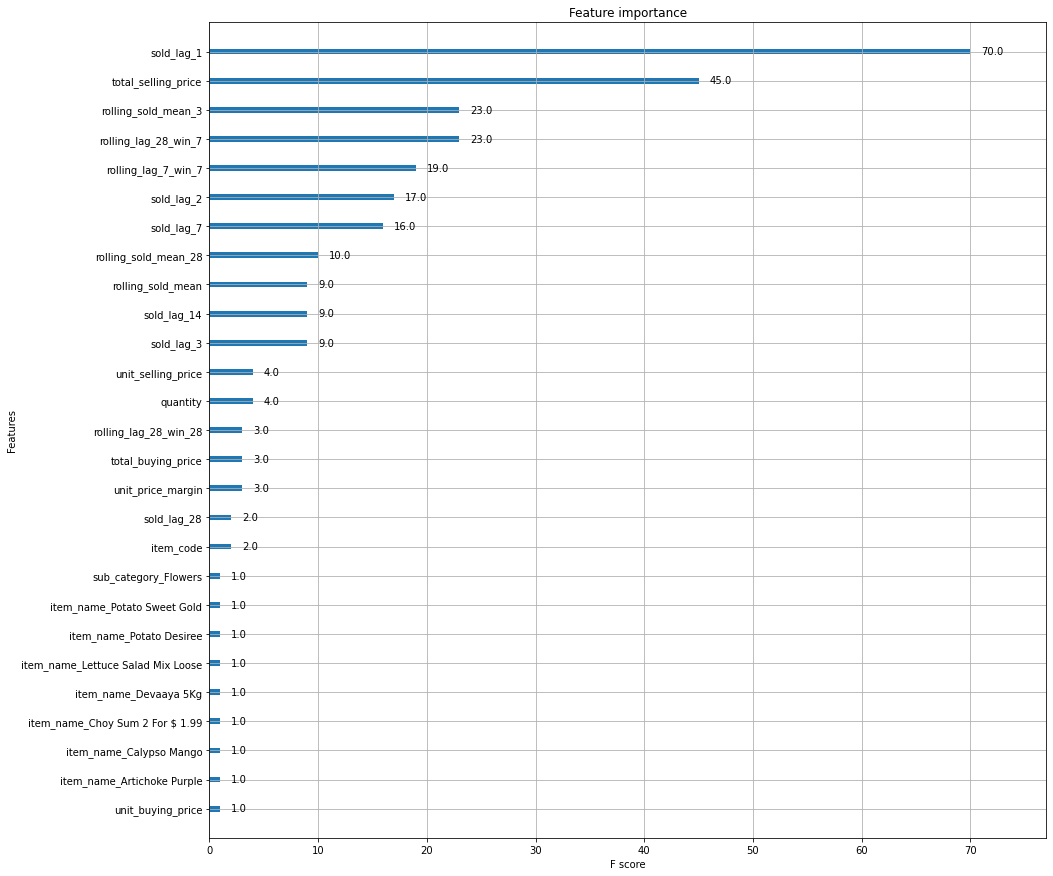

In [34]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

s = xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()


fig = s.get_figure()
fig.savefig("feat.png")


In [37]:
df_test['date'].shape

(7932,)

In [39]:
df_test['preds'] = preds

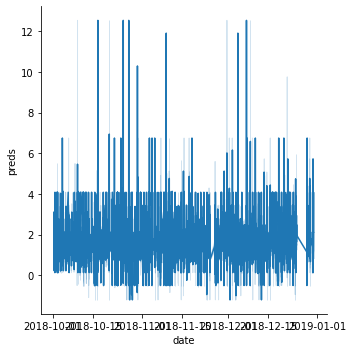

In [42]:
sns.relplot(x='date', y='preds', data=df_test,kind="line")
plt.rcParams['figure.figsize'] = [15, 15]